# PCA With Diabetes Dataset

In [1]:
# Imports packages
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/mpHarm88/datasets/master/diabetes.csv")
# show the 5 top rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Variables Definitions:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

## Split Data

In [3]:
# split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = df[feature_cols] # Features
y = df.Outcome # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## EDA

In [4]:
# describe dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# info about the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [6]:
# is there a missing values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

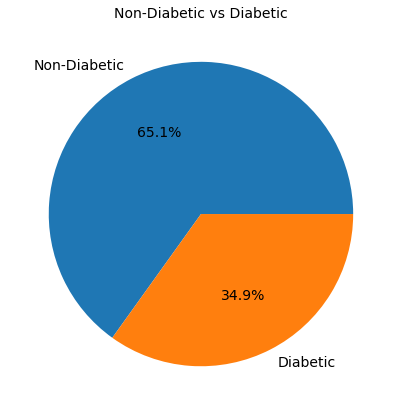

In [7]:
plt.figure(figsize=(7,7))
plt.pie(df['Outcome'].value_counts(sort = True),
        labels=['Non-Diabetic', 'Diabetic'],
        autopct='%1.1f%%', 
       textprops={'fontsize': 14})

plt.title('Non-Diabetic vs Diabetic', fontsize =14)
plt.show()

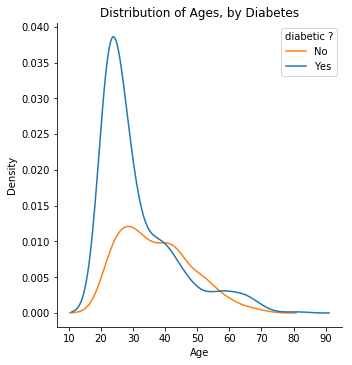

In [8]:
sns.displot(df, x="Age", hue="Outcome", kind="kde", legend=False)
plt.legend(title='diabetic ?', labels=['No', 'Yes'])
plt.title("Distribution of Ages, by Diabetes");

We can see from the plot that the majority of patients with diabetes are between 10 to 35 years old.

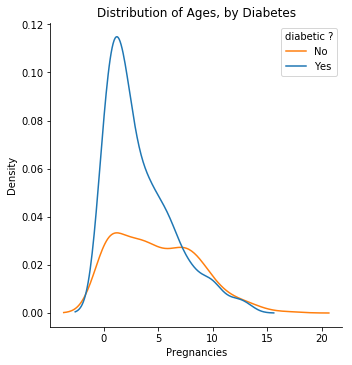

In [9]:
sns.displot(df, x="Pregnancies", hue="Outcome", kind="kde", legend=False)
plt.legend(title='diabetic ?', labels=['No', 'Yes'])
plt.title("Distribution of Ages, by Diabetes");

We can see from the graph that the majority of patients with diabetes have children between 0 to 9 kids.

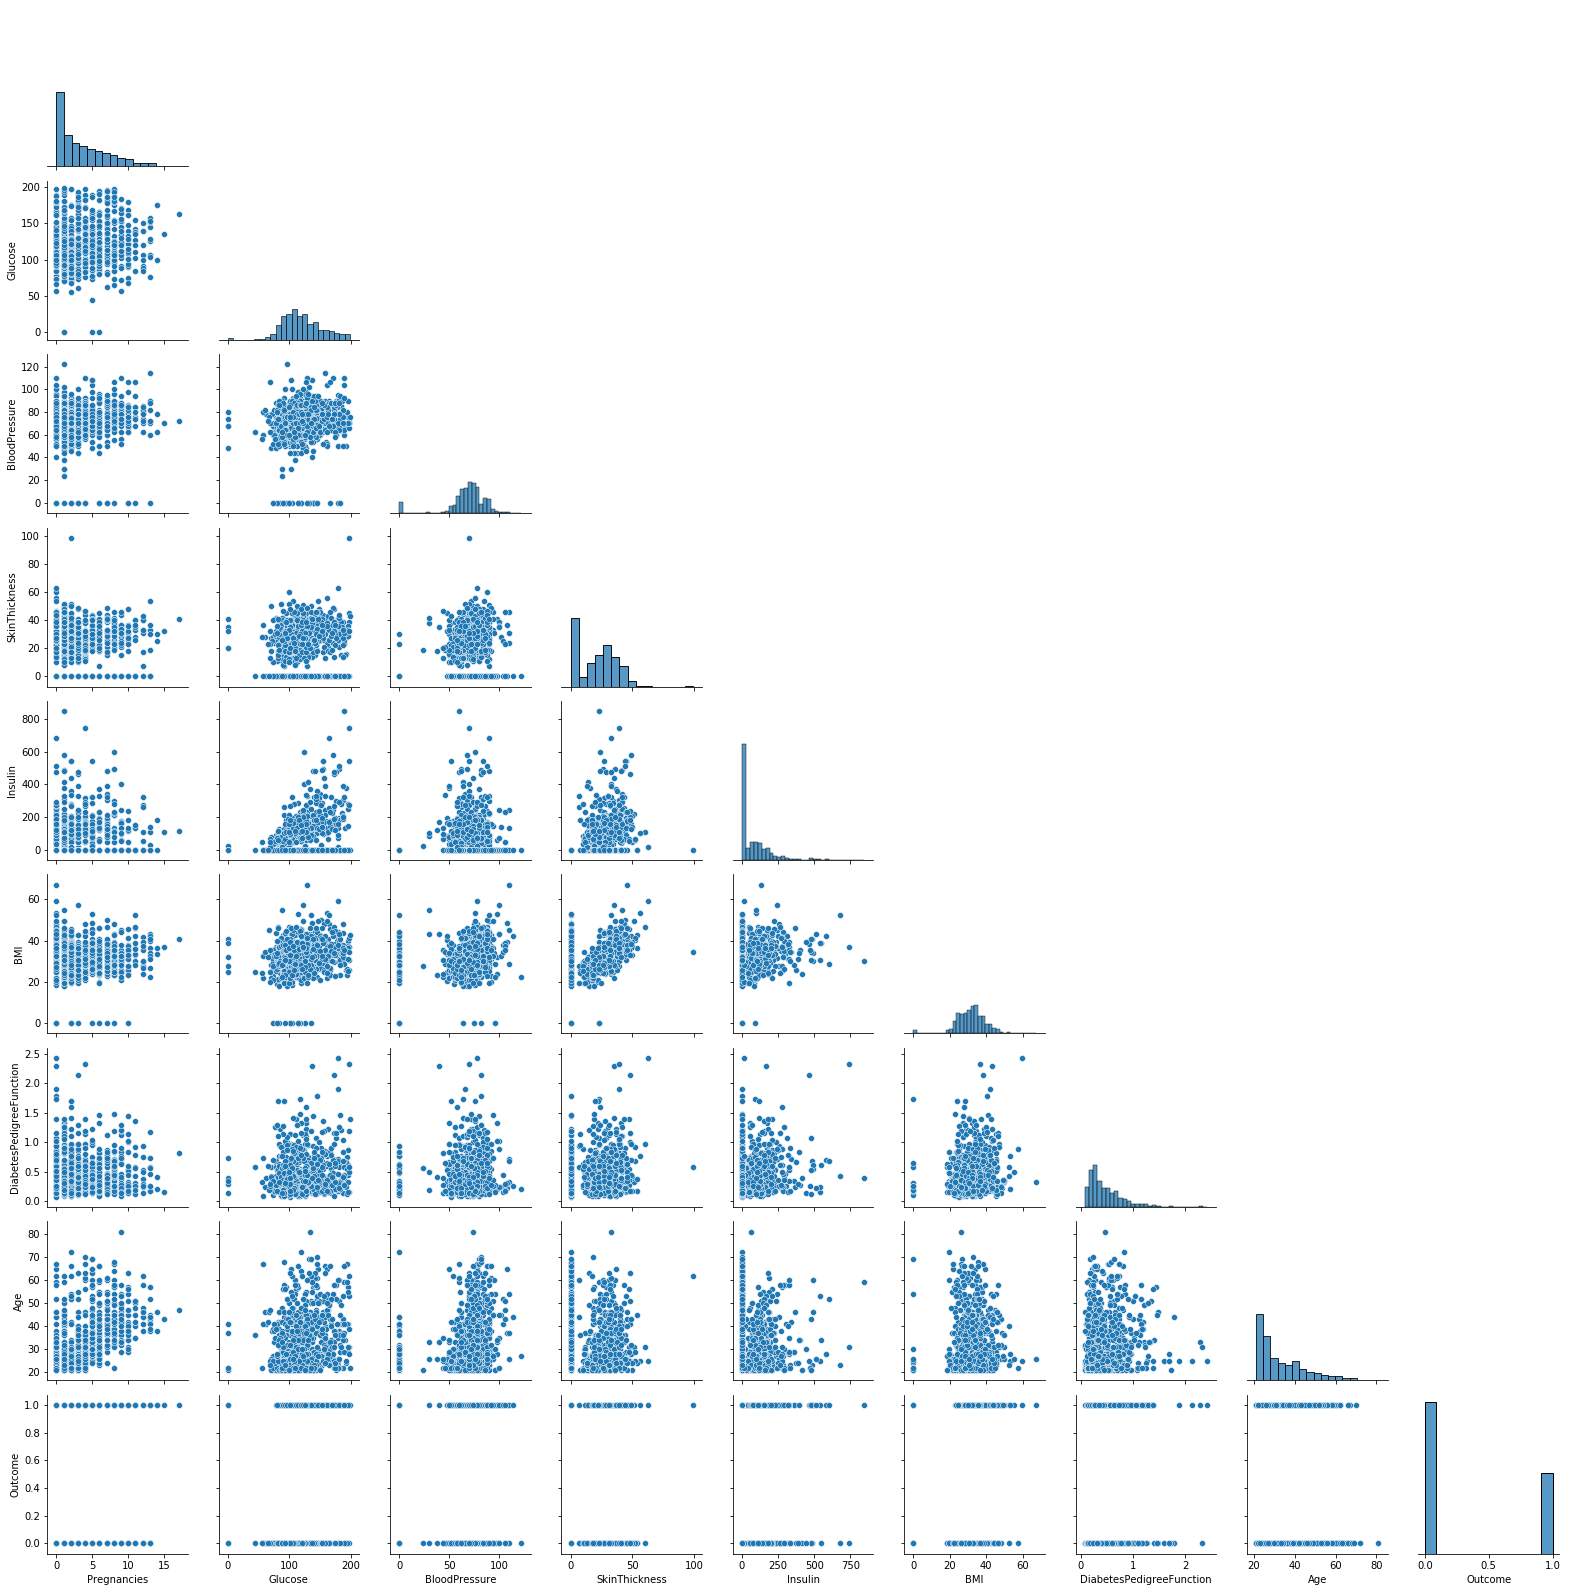

In [10]:
# scatter plot all the variables in the dataset
sns.pairplot(df, corner=True);

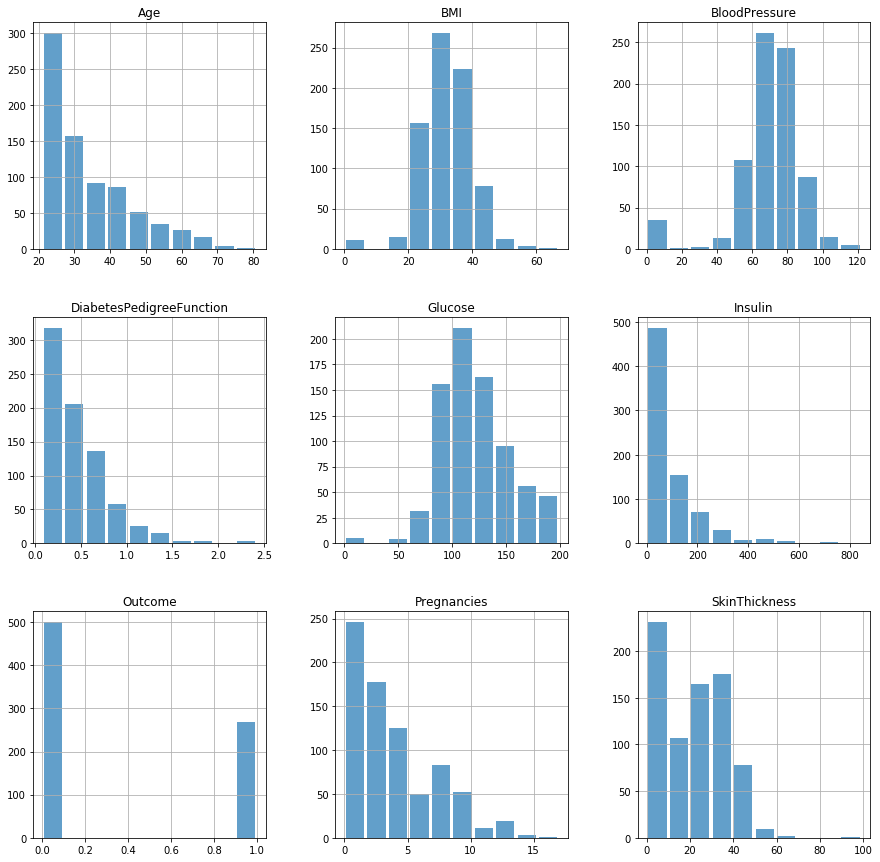

In [11]:
df.hist(figsize = (15, 15),alpha=0.7, rwidth=0.85);

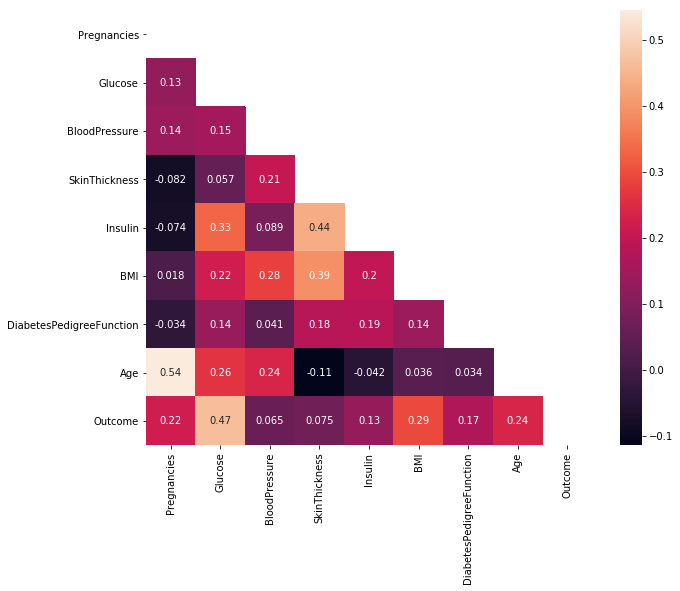

In [12]:
# heat-map for all variables in the dataset to find the relationship between the variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, mask=np.triu(df.corr()))

There is an medium relationship between age and number of pregnancies, And between Inslin and SkinThickness, And between Inslin and Outcome the rest of variables they have a weak relationships.

There is a relationship between age and the number of pregnancies, and this makes sense
The higher the age, the higher the number of pregnancies.

The following figure supports our conclusion here.

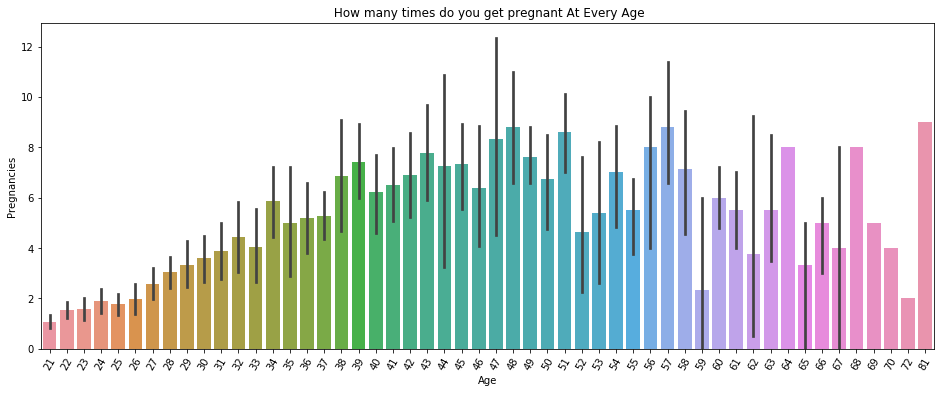

In [13]:
plt.figure(figsize = (16, 6))
sns.barplot(x = 'Age', y = 'Pregnancies', data = df)
plt.xticks(rotation = 60)
plt.title(" How many times do you get pregnant At Every Age");

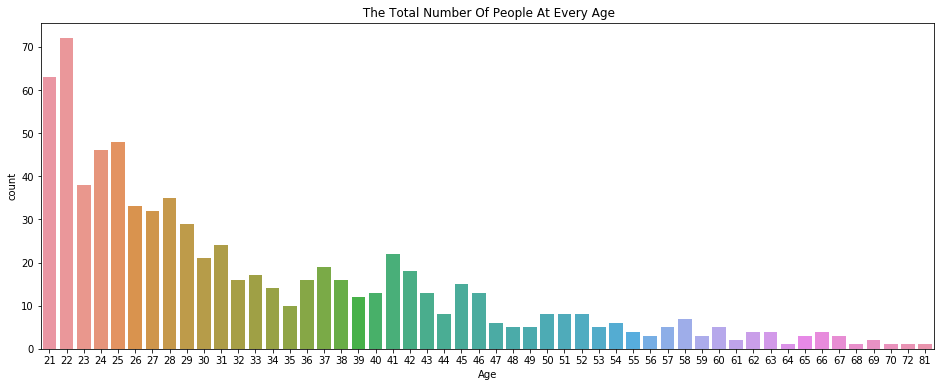

In [14]:
plt.figure(figsize = (16, 6))
# plot Attrition by Gender
sns.countplot(x = "Age", data=df);
plt.title(" The Total Number Of People At Every Age");

In this dataset, we find that the majority of patients are between 21 and 29 years old

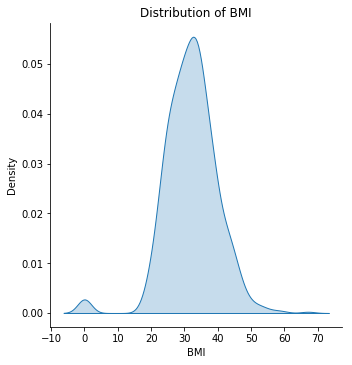

In [15]:
sns.displot(df, x="BMI", kind="kde", fill=True)
# plot title
plt.title("Distribution of BMI");

In these data we find that the majority of patients have a BMI between 20 and 50.

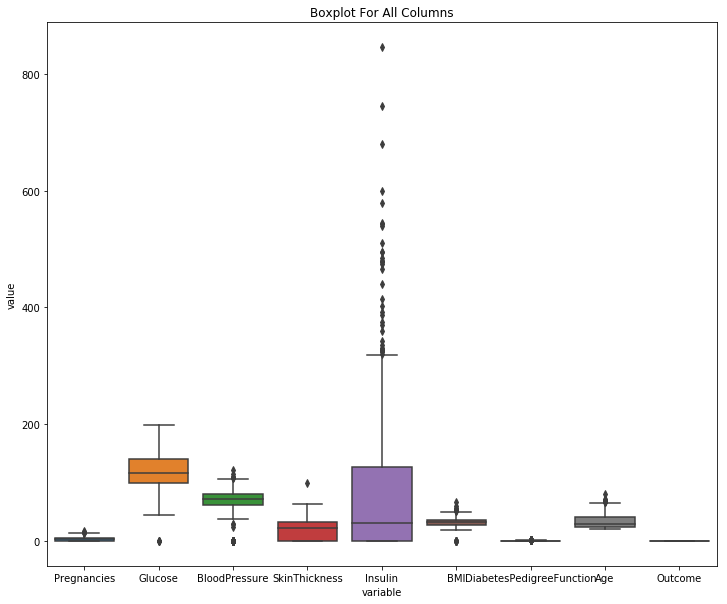

In [16]:
plt.figure(figsize = (12, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.title("Boxplot For All Columns");

## Baseline Model

In [17]:
# baseline (majority class)
y_train.value_counts(normalize=True)

0    0.659218
1    0.340782
Name: Outcome, dtype: float64

## Scale Data

In [18]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [19]:
# Convert numpy.ndarray to dataframe
df_Xtrain_scale = pd.DataFrame(scaler.fit_transform(X_train), columns = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
df_Xtrain_scale.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02
mean,7.773629e-17,-1.571265e-17,6.574505e-17,1.612614e-17,9.551639e-17,-9.603326e-17,1.806955e-16,-1.856574e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00
min,-1.121017e+00,-3.876353e+00,-3.431065e+00,-1.225722e+00,-6.882218e-01,-4.152250e+00,-1.151210e+00,-1.029810e+00
25%,-8.227090e-01,-6.728048e-01,-3.459142e-01,-1.225722e+00,-6.882218e-01,-6.310642e-01,-6.855061e-01,-7.788991e-01
50%,-2.260922e-01,-1.282016e-01,1.516907e-01,9.145608e-02,-6.882218e-01,2.100714e-02,-3.399835e-01,-3.607139e-01
75%,6.688329e-01,6.086145e-01,5.497747e-01,7.814063e-01,4.306802e-01,5.948299e-01,4.351890e-01,6.429305e-01
max,3.353608e+00,2.466673e+00,2.639715e+00,4.983831e+00,5.918628e+00,4.598548e+00,5.590987e+00,3.235678e+00


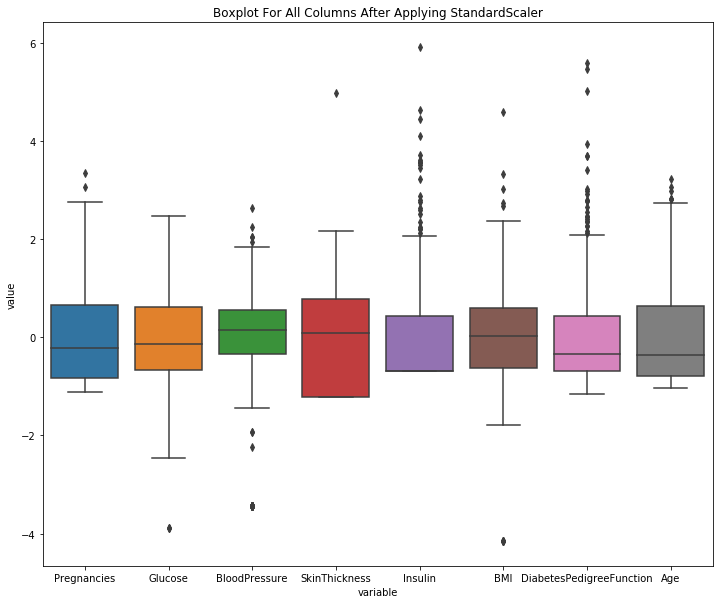

In [20]:
# show the columns after the scaling
plt.figure(figsize = (12, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df_Xtrain_scale))
plt.title("Boxplot For All Columns After Applying StandardScaler");

## Logistic Regression Model

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(X_train, y_train)

LogisticRegression()

In [23]:
lr.classes_

array([0, 1], dtype=int64)

In [24]:
lr.intercept_

array([-7.86823406])

In [25]:
lr.coef_

array([[ 0.10143091,  0.03358645, -0.01571083, -0.00134761, -0.00069745,
         0.08943419,  0.56048783,  0.01705767]])

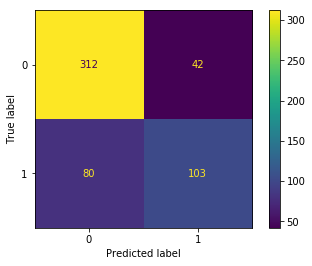

In [26]:
# Confusion matrix for train dataset
plot_confusion_matrix(lr, X_train, y_train);

### Evaluate Model

In [27]:
print(f"Training accuracy: {lr.score(X_train, y_train)}")
print(f"Testing accuracy: {lr.score(X_test, y_test)}")

Training accuracy: 0.7728119180633147
Testing accuracy: 0.7835497835497836


In [28]:
print(classification_report(y_train, lr.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.71      0.56      0.63       183

    accuracy                           0.77       537
   macro avg       0.75      0.72      0.73       537
weighted avg       0.77      0.77      0.77       537



### Compare Logistic Regression Model Results to Baseline Model
From the report above we find that the **Logistic Regression Model** performed better than **Baseline Model**

## Perform PCA

In [29]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(X_train_sc)

PCA()

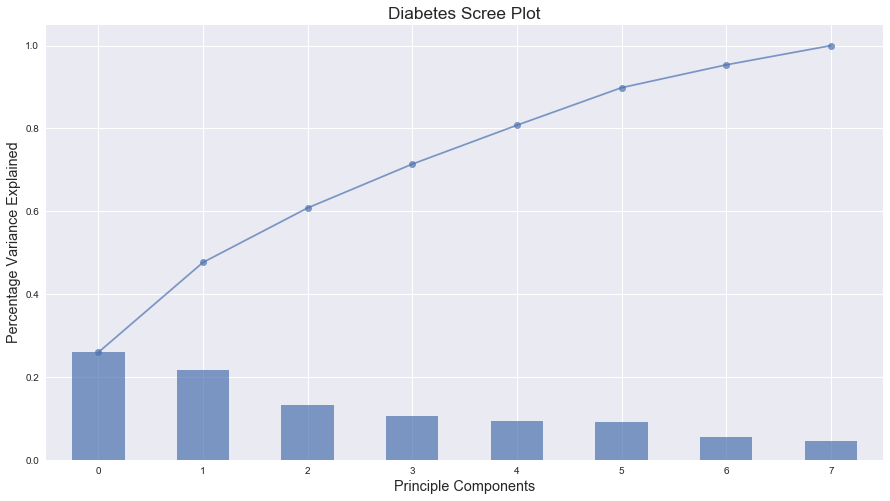

In [30]:
plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7) #plot line chart of increasing variances
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();

In [31]:
# fit PCA
pca = PCA(n_components = 4)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

lr.fit(X_train_pca, y_train)

LogisticRegression()

### Evaluate Model

In [32]:
print(f"Training accuracy: {lr.score(X_train_pca, y_train)}")
print(f"Testing accuracy: {lr.score(X_test_pca, y_test)}")

Training accuracy: 0.7374301675977654
Testing accuracy: 0.7619047619047619


As we can see that the score decreased when we apply the **PCA** on the **Logistic Regression Model**, We tested all numbers for `n_components`, not just 4, but all results were less than **Logistic Regression Model**.

But for the **Baseline** we find that **PCA** performs better.

In conclusion, the best performance was for the **Logistic Regression Model**, then the **PCA**, then the **Baseline**.